In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

## Problem 1
How many samples are there in the dataset?



## Solution

In [3]:
# Enter your solution here
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [4]:
# Enter your solution here
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



## Solution

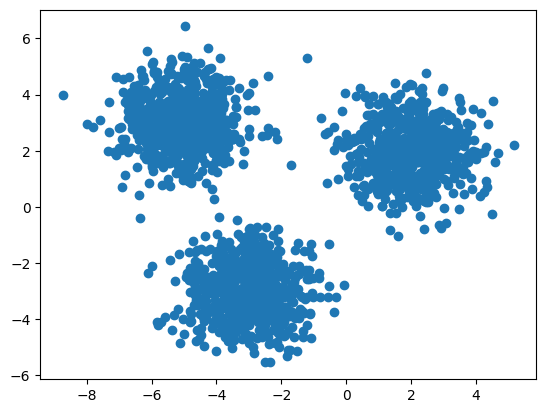

In [5]:
# Enter your solution here
plt.scatter(X[:,0],X[:,1])

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [6]:
# Enter your code here
k = 3
cluster_centers = X[[200,800,1200],:]

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [13]:
# Enter your solution here
def assign_clusters(X, k, cluster_centers):
    z = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        min_dist = np.inf
        for j in range(k):
            dist = np.linalg.norm(X[i] - cluster_centers[j])
            if dist < min_dist:
                min_dist = dist
                z[i] = j
    return z

z = assign_clusters(X, k, cluster_centers)
print(np.mean(z))
cat = np.unique(z)
print(cat)

0.7107107107107107
[0. 1. 2.]


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

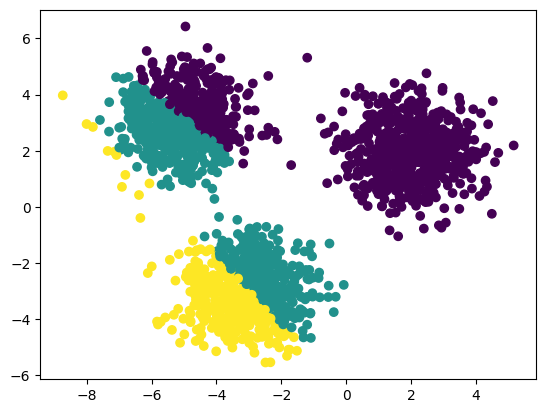

In [14]:
# Enter your solution here
plt.scatter(X[:,0],X[:,1],c=z)

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [15]:
# Enter your solution here
def compute_cluster_centers(X, z, k):
    cluster_centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_centers[i] = np.mean(X[z == i], axis=0)
    return cluster_centers

cluster_centers = compute_cluster_centers(X, z, k)
print(np.mean(cluster_centers, axis=0))

[-2.55251646 -0.19225194]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

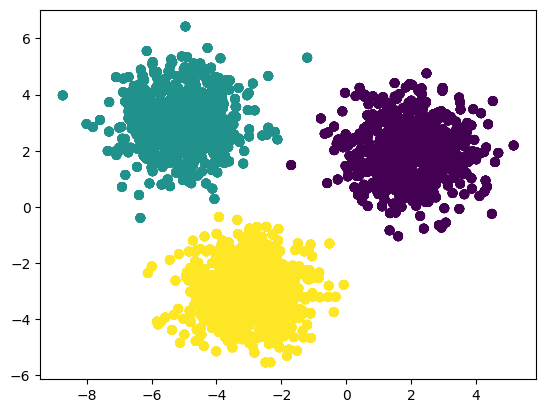

In [16]:
# Enter your code here
for i in range(10):
    z = assign_clusters(X, k, cluster_centers)
    cluster_centers = compute_cluster_centers(X, z, k)
    plt.scatter(X[:,0],X[:,1],c=z)